# Time Series Stationarity

## What is Stationarity?

A time series is stationary if it does not exhibit any long term trends or obvious seasonality. 

It has:

- A constant variance through time
- A constant mean through time
- The statistical properties of the time series do not change

## Visualise Data

(Data sourced from [Kaggle](https://www.kaggle.com/datasets/ashfakyeafi/air-passenger-data-for-time-series-analysis) with a CC0 licence)

In [2]:
# Import packages
import plotly.express as px
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
# Read in the data
data = pd.read_csv('/Users/nicolaigarderhansen/Desktop/AirPassengers.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


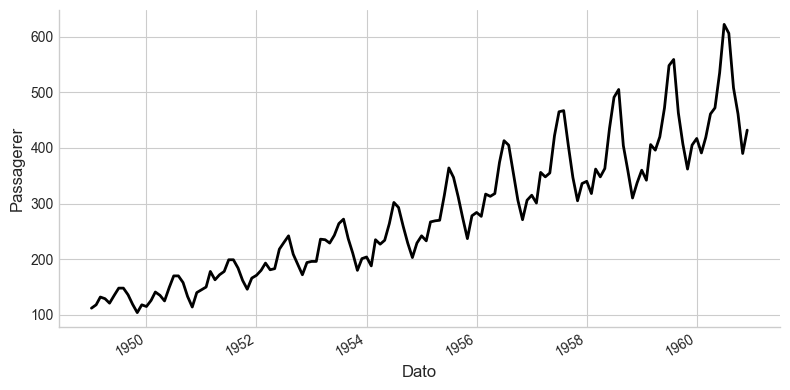

In [15]:
def plot_airline_passengers(
    df,
    title="",
    x_col="Month",
    y_col="#Passengers",
    x_label="Dato",
    y_label="Passagerer",
    trend_window=12   # glidende middel over én sæson
):
    """Line chart + trend for AirPassengers‐lignende data."""
    df = df.copy()
    df[x_col] = pd.to_datetime(df[x_col])

    # --- beregn trend -------------------------------------------------------
    df["trend"] = (
        df[y_col]
        .rolling(window=trend_window, center=True)
        .mean()
    )

    # --- plot ---------------------------------------------------------------
    fig, ax = plt.subplots(figsize=(8, 4))

    # hovedserie i sort
    ax.plot(df[x_col], df[y_col], color="black", lw=2)

    # trendlinje (stiplet, defaultfarve)
    # ax.plot(
    #     df[x_col],
    #     df["trend"],
    #     linestyle="--",
    #     lw=2,
    #     label=f"{trend_window}-måneders trend"
    # )

    ax.set_title(title, fontsize=16, pad=10)
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)

    ax.spines[["top", "right"]].set_visible(False)
    fig.autofmt_xdate()
    ax.legend()
    fig.tight_layout()
    plt.show()

plot_airline_passengers(data)


Is this time series stationary? No.

There is a clear increasing trend and the variance of fluctuations are also increasing in time.

To make the time series stationary, we need apply transformations to it.

## Differencing

The most common transformation is differencing.

Where d(t) is the difference at time t between the series at points y(t) and y(t-1).


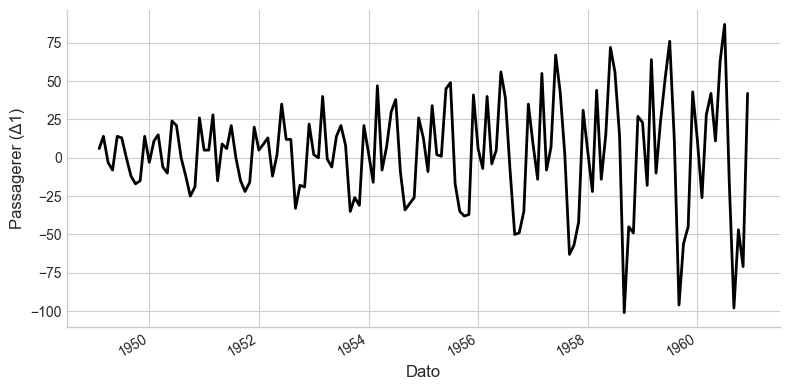

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# --- beregn 1. differens ----------------------------------------------------
data["Passenger_Diff"] = data["#Passengers"].diff()

# --- plotfunktion ----------------------------------------------------------
def plot_passenger_diff(df,
                        x_col="Month",
                        y_col="Passenger_Diff",
                        title="",
                        x_label="Dato",
                        y_label="Passagerer (Δ1)"):
    df = df.copy()
    df[x_col] = pd.to_datetime(df[x_col])

    fig, ax = plt.subplots(figsize=(8, 4))

    # sort linje med samme look-and-feel som før
    ax.plot(df[x_col], df[y_col], color="black", lw=2)

    ax.set_title(title, fontsize=16, pad=10)
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)

    # kosmetik
    ax.spines[["top", "right"]].set_visible(False)
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.show()

# --- brug funktionen -------------------------------------------------------
plot_passenger_diff(data)

Is the data now stationary? No.

The mean is now constant and is oscillating about zero. However, we can clearly see the variance is still increasing through time.

## Logarithm Transform

To stabilise the variance, we apply the natural log transform.

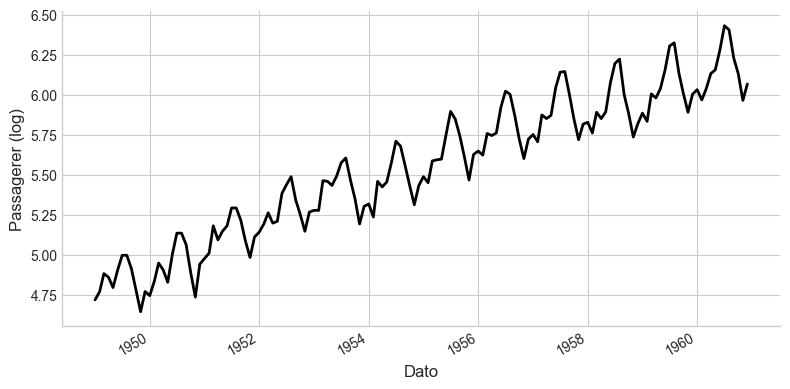

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- beregn log-transform ---------------------------------------------------
data["Passenger_Log"] = np.log(data["#Passengers"])

# --- plotfunktion ----------------------------------------------------------
def plot_passenger_log(df,
                       x_col="Month",
                       y_col="Passenger_Log",
                       title="",
                       x_label="Dato",
                       y_label="Passagerer (log)"):
    df = df.copy()
    df[x_col] = pd.to_datetime(df[x_col])

    fig, ax = plt.subplots(figsize=(8, 4))

    # sort linje som i de andre plots
    ax.plot(df[x_col], df[y_col], color="black", lw=2)

    ax.set_title(title, fontsize=16, pad=10)
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)

    # kosmetik
    ax.spines[["top", "right"]].set_visible(False)
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.show()

# --- brug funktionen -------------------------------------------------------
plot_passenger_log(data)

The fluctuations are now on a consistent scale, but there is still a trend. Therefore, we now again have to apply the difference transform.

## Logarithm and Differenc Transform

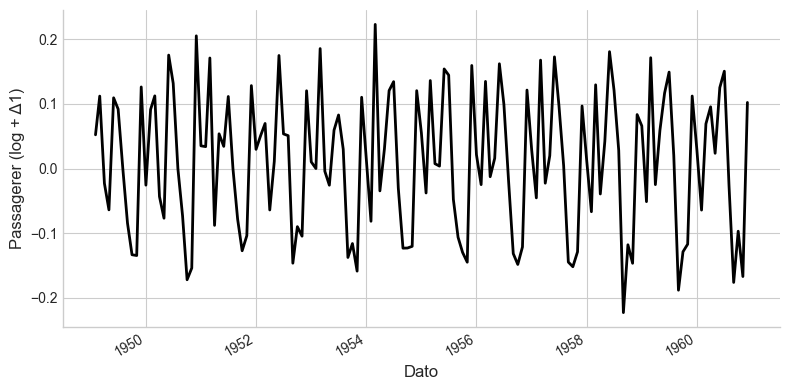

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- log + 1. differens -----------------------------------------------------
# (skip these two lines if du allerede har kolonnerne)
data["Passenger_Log"]      = np.log(data["#Passengers"])
data["Passenger_Diff_Log"] = data["Passenger_Log"].diff()

# --- plotfunktion ----------------------------------------------------------
def plot_passenger_logdiff(df,
                           x_col="Month",
                           y_col="Passenger_Diff_Log",
                           title="",
                           x_label="Dato",
                           y_label="Passagerer (log + Δ1)"):
    df = df.copy()
    df[x_col] = pd.to_datetime(df[x_col])

    fig, ax = plt.subplots(figsize=(8, 4))

    # hovedserie i sort for konsistent stil
    ax.plot(df[x_col], df[y_col], color="black", lw=2)

    ax.set_title(title, fontsize=16, pad=10)
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)

    # kosmetik
    ax.spines[["top", "right"]].set_visible(False)
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.show()

# --- brug funktionen -------------------------------------------------------
plot_passenger_logdiff(data)


Is the data now stationary? Yes!

As we can see, the mean and variance is now constant and has no long term trend.

## Stationarity Test

There are more quantitative techniques to determine if the data is indeed stationary.

One such method is the Augmented Dickey-Fuller (ADF) test. This is a statistical hypothesis test where the null hypothesis is the series is non-stationary (also known as a unit root test).

In [8]:
# ADF test
def adf_test(series):
    """Using an ADF test to determine if a series is stationary"""
    test_results = adfuller(series)
    print('ADF Statistic: ', test_results[0])
    print('P-Value: ', test_results[1])
    print('Critical Values:')
    for thres, adf_stat in test_results[4].items():
        print('\t%s: %.2f' % (thres, adf_stat))


adf_test(data["Passenger_Diff_Log"][1:])

ADF Statistic:  -2.7171305983881386
P-Value:  0.07112054815085783
Critical Values:
	1%: -3.48
	5%: -2.88
	10%: -2.58


The ADF P-value (7.1%) is in-between the 5% and 10%, so depending on where you set your significance level we either reject or fail to reject the null hypothesis.